# Souces and literature 

type of admission column: https://www.providence.org/services/emergency-care/emergency-trauma-or-urgent-care

hospital type code: https://resdac.org/cms-data/variables/hospital-type-code

Performance metrics: https://www.arxiv-vanity.com/papers/2008.05756/

# Business Case

Data science have the potential to revolutionize the healthcare sector, by enabling more accurate and efficient decision making. In the current scenario, where the healthcare system is under immense pressure due to the COVID-19 pandemic, the use of data science and machine learning can help us to better understand the spread of the virus and its impact on patients. By analyzing large amounts of data, we can identify patterns and trends that would be difficult to discern through traditional methods. This can help us to make more informed decisions about how to allocate resources, and to develop more effective treatment strategies.

The COVID-19 pandemic has brought to light the dire need for effective hospital bed management. With the rapid spread of the virus, hospitals across India faced a shortage of beds, leaving patients struggling to find a place to receive care. This not only resulted in long wait times, but also led to patients being forced to pay exorbitant amounts of money for a bed. In light of these challenges, it is clear that there is a critical need for a system that can predict how long patients will stay in the hospital. Such a system would enable hospitals to better manage their bed capacity, ensuring that beds are available for those who need them most. By leveraging the power of machine learning, this project aims to develop a predictive model that can accurately forecast a patient's hospital stay. This will not only help patients avoid extra waiting and money, but also enable hospitals to optimize their resources and provide better care for all.

<p style='font-size:1.3em; color:tomato'> Accurately predicting the length of stay for each patient on a case-by-case basis can greatly benefit hospitals by allowing for optimal resource allocation and improved overall functioning. By utilizing this information, hospitals can better plan and allocate resources, such as beds and staff, leading to increased efficiency and cost savings. Additionally, knowing the expected length of stay for each patient can also improve patient care and outcomes by ensuring that they receive the appropriate level of care during their stay. The 11 different length of stay classes, ranging from 0-10 days to over 100 days, provide a comprehensive understanding of patient needs and allows for tailored resource allocation. Investing in a system to predict length of stay can ultimately lead to improved patient outcomes and cost savings for the hospital.

### Length of Stay (LoS)

The length of stay (LOS) in a hospital, or the number of days from a patient’s admission to release, serves as a strong indicator of both medical and financial efficiency. A shorter LOS reduces the risk of acquiring staph infections and other healthcare-related conditions, frees up vital bed spaces, and cuts overall medical expenses — to name just key advantages.

# Dataset

The dataset contains following attributes. Many of them are self explainatory. However, let's put down each of them into simple words.

- case_id: A unique identifier for each case in the dataset

- Hospital_code: The code assigned to the hospital where the case was treated [ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20]

- Hospital_type_code: The type of hospital ['c', 'e', 'b', 'a', 'f', 'd', 'g']

- City_Code_Hospital: The code assigned to the city where the hospital is located [ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13]

- Hospital_region_code: The code assigned to the region where the hospital is located ['Z', 'X', 'Y']

- Available_Extra_Rooms_in_Hospital: The number of extra rooms available in the hospital

- Department: The department within the hospital where the patient was treated

- Ward_Type: The type of ward where the patient was treated ['R', 'S', 'Q', 'P', 'T', 'U']

- Ward_Facility_Code: The code assigned to the ward where the patient was treated ['F', 'E', 'D', 'B', 'A', 'C']

- Bed_Grade: The grade assigned to the bed where the patient was treated [ 2.,  3.,  4.,  1.]

- patientid: A unique identifier for the patient

- City_Code_Patient: The code assigned to the city where the patient is from [ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., nan, 25., 15.,
       12., 10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27., 22., 19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.]

- Type_of_Admission: The type of admission ['Emergency', 'Trauma', 'Urgent']

- Severity_of_Illness: A rating of the severity of the patient's illness ['Extreme', 'Moderate', 'Minor']

- Visitors_with_Patient: The number of visitors allowed with the patient

- Age: The age of the patient

- Admission_Deposit: The amount of deposit paid at the time of admission

- Stay: The length of stay in the hospital for the patient. This is our target. It is given in the form of groups such as 0-10, 11,20, 21-30 etc.

# Performance Metrix

By looking at the target column, we understand that the project falls in classification type. Here we have to predict the length of stay category (0 to 10, 11 to 20 and so on). 


From top level, we have understood that this business problem fall into multiclass classification problem. For classification problem, we use different metrics such as accuracy, precisioon, recall, F1 score, AUC score, etc. Many metrics are based on the Confusion Matrix, since it encloses all the relevant information about the algorithm and classification rule performance. We will primarily look at Accuracy score as the metric is very intuitive and easy to understand. Both in binary cases and multi-class cases the Accuracy assumes values between values 0 and 1, while the quantity missing to reach 1 is called Misclassification Rate. 


In [1]:
#basics libraries
import numpy as np
import pandas as pd
from scipy import stats

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#data preprocessing
from sklearn. model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#model development
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#model deployment
import pickle

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('HealthCareAnalytics.csv')

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


In [4]:
df.shape

(39801, 18)

There are 318438 records and 18 columns in the dataset

In [5]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [6]:
# Making column names to lowercase
df.columns=[x.lower() for x in df.columns]

In [7]:
df.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39801 entries, 0 to 39800
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            39801 non-null  int64  
 1   hospital_code                      39801 non-null  int64  
 2   hospital_type_code                 39801 non-null  object 
 3   city_code_hospital                 39801 non-null  int64  
 4   hospital_region_code               39801 non-null  object 
 5   available_extra_rooms_in_hospital  39801 non-null  int64  
 6   department                         39801 non-null  object 
 7   ward_type                          39801 non-null  object 
 8   ward_facility_code                 39801 non-null  object 
 9   bed_grade                          39793 non-null  float64
 10  patientid                          39801 non-null  int64  
 11  city_code_patient                  39473 non-null  flo

- There are total 318438 entries
- Dataset contains mixed data types ie. float64(x2), int64(x7), object(x9)
- bed-grade and city_code_patient columns contain missing values

In [9]:
df[['available_extra_rooms_in_hospital', 'visitors_with_patient', 'admission_deposit']].describe()

,available_extra_rooms_in_hospital,visitors_with_patient,admission_deposit
count,39801.000000,39800.000000,39800.000000
mean,3.112686,3.227864,4966.486910
std,1.135888,1.721177,1047.492902
min,0.000000,0.000000,1820.000000
25%,2.000000,2.000000,4294.000000
50%,3.000000,3.000000,4843.000000
75%,4.000000,4.000000,5482.000000
max,12.000000,24.000000,10999.000000


- Running .describe() method on caseID and patientID columns does not make much sense even though they are numberical columns. Hence we have selected 3 particular columns.
- On an average there are 3 extra rooms are available in the hospital. Minimum O and maximum 24 extra rooms are available
- There is a patient with 32 visitors accompanying him. It is the highest number of visitors among all. When we see it on average scale, a patient is accompanied with 3 visitors. 
- Highest deposit paid for admission is 11008 INR

In [10]:
df.describe(include='O')

,hospital_type_code,hospital_region_code,department,ward_type,ward_facility_code,type_of_admission,severity_of_illness,age,stay
count,39801,39801,39801,39801,39801,39801,39800,39800,39800
unique,7,3,5,5,6,4,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,31-40,21-30
freq,17378,16271,30323,16231,13599,21456,23095,7823,11743


- A significant portion of patients are seen in the Gynecology department.
- Many patients exhibit signs of trauma.
- The majority of patients admitted have moderate levels of illness.
- The age group with the highest representation among patients is 41-50 years old.

In [11]:
df.duplicated().sum()

0

There are no duplicates in the dataset

# Exploratory Data Analysis

### Uniques values in each categorical column

In [12]:
for column in df:
    if df[column].dtype=='object':
        print('Unique values in \'{}\' column are'.format(column))
        unique=list(df[column].unique())
        print(unique)
        print('Number of unique values: {}'.format(len(unique)))
        print('=================================================================================')

Unique values in 'hospital_type_code' column are
['c', 'e', 'b', 'a', 'f', 'd', 'g']
Number of unique values: 7
Unique values in 'hospital_region_code' column are
['Z', 'X', 'Y']
Number of unique values: 3
Unique values in 'department' column are
['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease', 'surgery']
Number of unique values: 5
Unique values in 'ward_type' column are
['R', 'S', 'Q', 'P', 'T']
Number of unique values: 5
Unique values in 'ward_facility_code' column are
['F', 'E', 'D', 'B', 'A', 'C']
Number of unique values: 6
Unique values in 'type_of_admission' column are
['Emergency', 'Trauma', 'Urgent', 'Tr']
Number of unique values: 4
Unique values in 'severity_of_illness' column are
['Extreme', 'Moderate', 'Minor', nan]
Number of unique values: 4
Unique values in 'age' column are
['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30', 'Nov-20', '0-10', '91-100', nan]
Number of unique values: 11
Unique values in 'stay' column are
['0-10', '41-50', '31-40

Even though, hospital_code and city_code_hospital contain numeric values, they can be regarded as categorical values which will be repeated in the datasets in respective columns

### Value counts in each categorical column

In [14]:
df.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


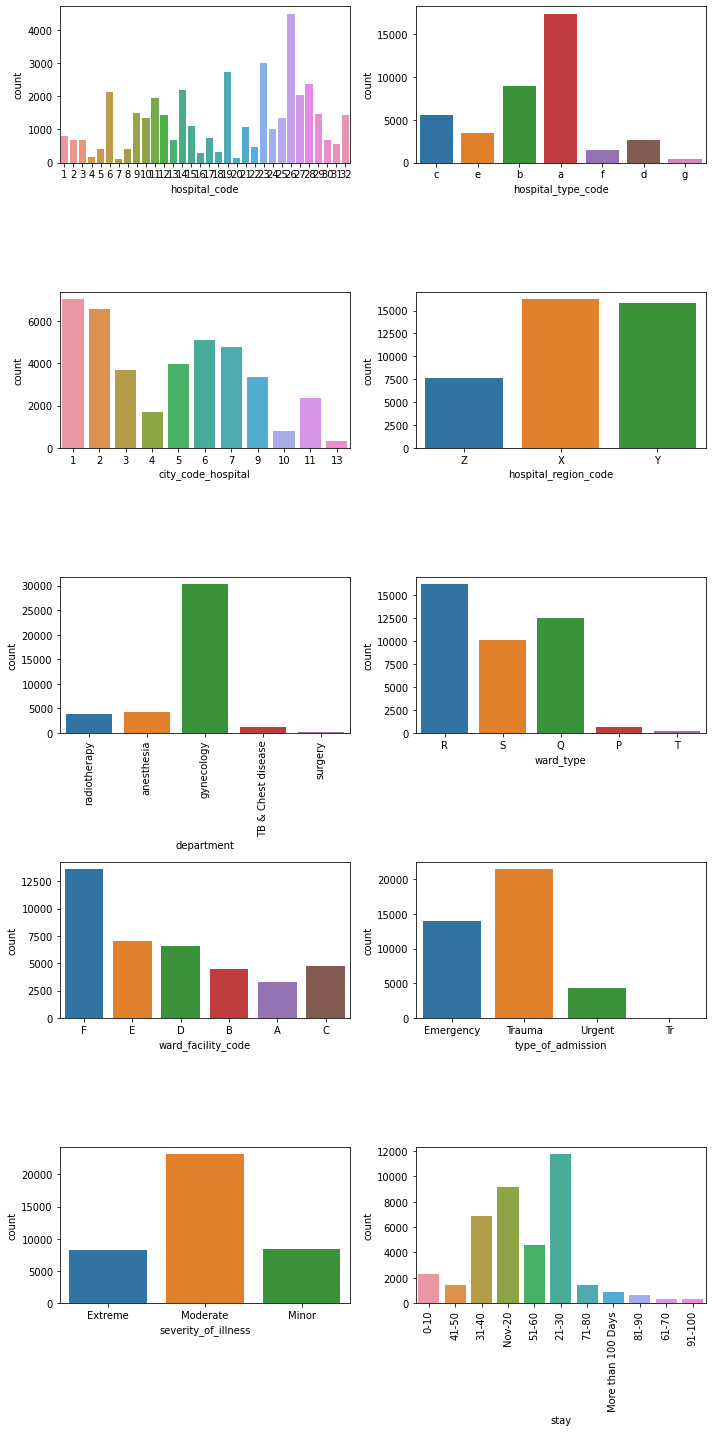

In [21]:
fig, ax= plt.subplots(5,2, figsize=(10,20))
columns=['hospital_code', 'hospital_type_code', 'city_code_hospital', 'hospital_region_code', 'department', 'ward_type', 'ward_facility_code', 'type_of_admission', 'severity_of_illness', 'stay']

for column, ax in zip(columns, ax.flatten()):
    #if df[column].dtype=='object':
      sns.countplot(column,data=df, ax=ax);

      if column=='department' or column=='stay':
          ax.set_xticklabels(labels=df[column].unique(), rotation=90)
plt.tight_layout()

These countplots will be very crucial in preparing training data for the model. As we can already see there are lot of imbalanced between categories of almost all the features. Stratified Sampling of the data becomes imperative before training the model. Otherwise, the categories with highest proportion will bring bias and hence will not be accurate.

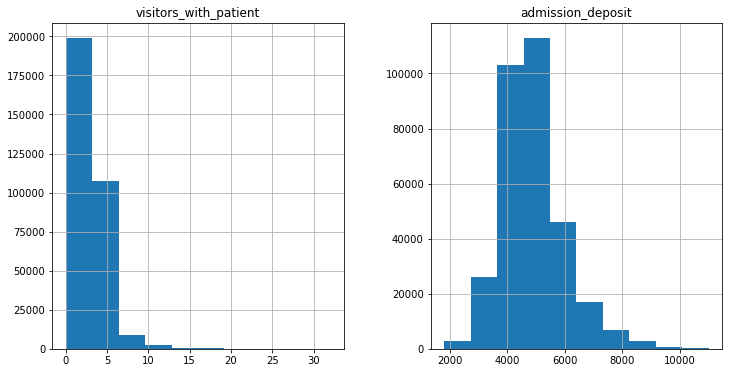

In [ ]:
df[['visitors_with_patient', 'admission_deposit']].hist(figsize=(12,6));

- Distribution of admission_deposit looks normal with it mean around 4966 and standard deviation of 1047
- On the contrary, the distribution of visitors_with_patient is highly right skewed. It means, number of visitors accompanying patients is more between 0 to 6 but the numbers also goes till 32

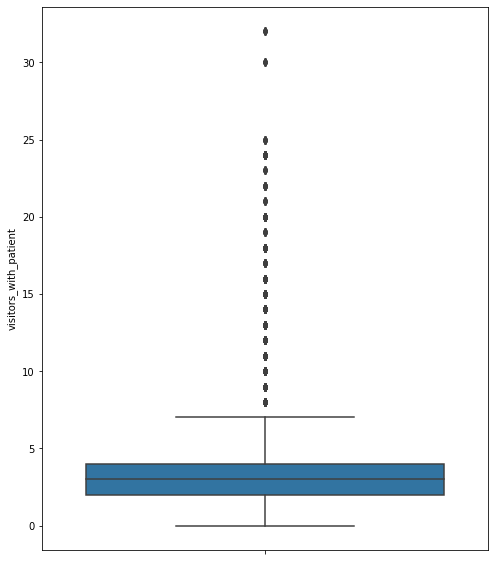

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y='visitors_with_patient', data=df);

- Column for number of visitors with patient contain outliers. Median value lies at 3.

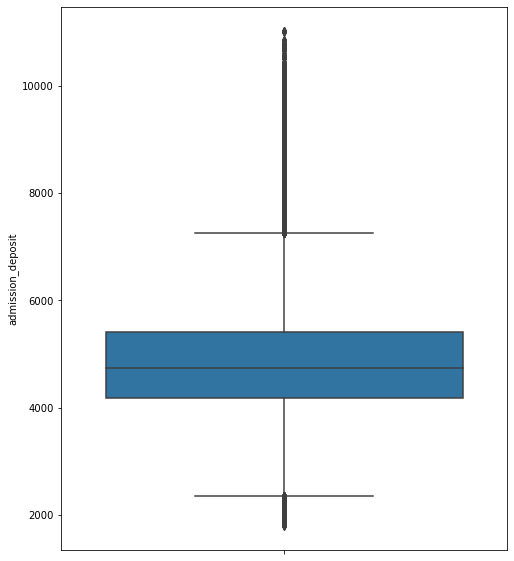

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y='admission_deposit', data=df);

- Mean admission deposit amount is 4880.75 and median is 4741. 
- 'admission_deposit' column also contains lot of outliers

In [27]:
#checking pearson's correlation
df.corr()

,case_id,hospital_code,city_code_hospital,available_extra_rooms_in_hospital,bed_grade,patientid,city_code_patient,visitors_with_patient,admission_deposit
case_id,1.000000,-0.004701,0.007262,0.009195,-0.000141,0.006785,-0.015646,-0.023967,-0.007142
hospital_code,-0.004701,1.000000,0.110921,-0.051427,-0.026408,-0.003035,-0.024248,-0.029159,0.048202
city_code_hospital,0.007262,0.110921,1.000000,-0.040219,-0.064524,-0.001740,-0.036276,0.013477,-0.033783
available_extra_rooms_in_hospital,0.009195,-0.051427,-0.040219,1.000000,-0.125915,0.008808,-0.037791,0.086529,-0.152638
bed_grade,-0.000141,-0.026408,-0.064524,-0.125915,1.000000,0.010013,0.010374,0.074723,0.093243
patientid,0.006785,-0.003035,-0.001740,0.008808,0.010013,1.000000,0.015708,0.007450,-0.001270
city_code_patient,-0.015646,-0.024248,-0.036276,-0.037791,0.010374,0.015708,1.000000,-0.007557,0.037969
visitors_with_patient,-0.023967,-0.029159,0.013477,0.086529,0.074723,0.007450,-0.007557,1.000000,-0.161216
admission_deposit,-0.007142,0.048202,-0.033783,-0.152638,0.093243,-0.001270,0.037969,-0.161216,1.000000


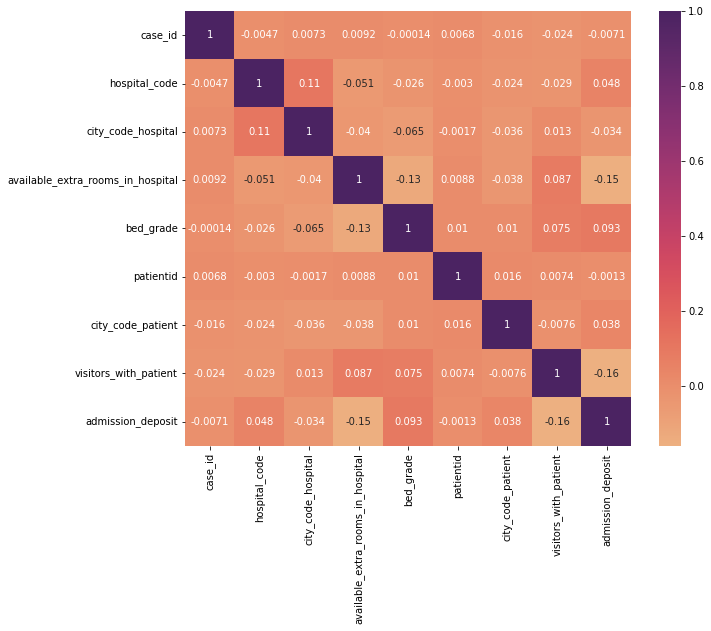

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='flare');

- We have keep in mind that the pearson's correlation coefficient is measure of linear relationship between the variables. However, for non-linear, it might not be correct measure to look at the correlation.

- As expected, the features are not strongly correlated with each other

# Data Preprocessing

In [ ]:
df.head(2)

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50


- From previous section, we have understood that the data is imbalanced with respect to both features and target. In such case if we sample data randomly, there is chance to introduce some bias in the final prediction. So, we will use statified sampling technique. 

- Let's assume that department is crucial feature affecting the duaration of stay. We have already that, for the department section, the amount of patients admitted to Gynacology department is much higher than other departments. 

- We want to ensure that the test set is representative of the various categories of departments in the whole dataset. We will use 'department' column to proportionally sample the data.

In [31]:
#instantiationg object for StratifiedShuffleSplit
strata_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strata_split.split(df, df["department"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [38]:
#checking data shapes
print('df', df.shape)
print('train', strat_train_set.shape)
print('test', strat_test_set.shape)

df (39801, 18)
train (31840, 18)
test (7961, 18)


Let's cross check whether proportion of the departments remained constant or not?

In [37]:
#for orignal dataset
df['department'].value_counts()/len(df)

gynecology            0.761865
anesthesia            0.107208
radiotherapy          0.097611
TB & Chest disease    0.029698
surgery               0.003618
Name: department, dtype: float64

In [39]:
#for shuffled data
strat_train_set['department'].value_counts()/len(strat_train_set)

gynecology            0.761872
anesthesia            0.107192
radiotherapy          0.097613
TB & Chest disease    0.029711
surgery               0.003612
Name: department, dtype: float64

The proportions of department wise entries are same for both original and shuffled data which indicates that the data is correctly splitted into train and test sets

## Removing ID columns

ID columns are generally unique values assgined to objects and people. They are not considered in affecting the target variable. So lets remove case_id and patientid columns from the dataset. Otherwise they are increasing the dimentionality of the dataset for no reason.

In [40]:
# train
strat_train_set.drop(columns=['case_id', 'patientid'], inplace=True)
# test
strat_test_set.drop(columns=['case_id', 'patientid'], inplace=True)

## Missing Values

In [ ]:
strat_train_set.isna().mean()*100

hospital_code                        0.000000
hospital_type_code                   0.000000
city_code_hospital                   0.000000
hospital_region_code                 0.000000
available_extra_rooms_in_hospital    0.000000
department                           0.000000
ward_type                            0.000000
ward_facility_code                   0.000000
bed_grade                            0.036506
city_code_patient                    1.426104
type_of_admission                    0.000000
severity_of_illness                  0.000000
visitors_with_patient                0.000000
age                                  0.000000
admission_deposit                    0.000000
stay                                 0.000000
dtype: float64

Proportion of missing values is very less. We will remove the columns where the data contains missing values as it would not significanly harm our original data distribution.

- bed_grade contains 0.03% missing values
- city_code_patient contains 1.42% missing values

In [41]:
#train_set
strat_train_set.dropna(how='any', inplace=True)
#test_set
strat_test_set.dropna(how='any', inplace=True)

In [42]:
#cross checking the missing values
strat_train_set.isna().sum()

hospital_code                        0
hospital_type_code                   0
city_code_hospital                   0
hospital_region_code                 0
available_extra_rooms_in_hospital    0
department                           0
ward_type                            0
ward_facility_code                   0
bed_grade                            0
city_code_patient                    0
type_of_admission                    0
severity_of_illness                  0
visitors_with_patient                0
age                                  0
admission_deposit                    0
stay                                 0
dtype: int64

## Dropping Outliers

During EDA part, we have already seen that the dataset contained outliers in 'visitors_with_patient' and 'admission_deposit'. There proportions are approximately 3% for both. Since it is less that 5%, we are safe to drop them all without much affecting the orginal distribution.

In [43]:
## visitors_with_patient column
# train set
iqr_train= stats.iqr(strat_train_set['visitors_with_patient'])
min_limit_train=np.percentile(strat_train_set['visitors_with_patient'], 25, interpolation='midpoint')- 1.5*iqr_train
max_limit_train=np.percentile(strat_train_set['visitors_with_patient'], 75, interpolation='midpoint')+ 1.5*iqr_train


# test set
iqr_test= stats.iqr(strat_test_set['visitors_with_patient'])
min_limit_test=np.percentile(strat_test_set['visitors_with_patient'], 25, interpolation='midpoint')- 1.5*iqr_test
max_limit_test=np.percentile(strat_test_set['visitors_with_patient'], 75, interpolation='midpoint')+ 1.5*iqr_test

In [44]:
#finding proportion of outliers for train set
strat_train_set[strat_train_set['visitors_with_patient']> max_limit_train].count()/strat_train_set.shape[0]

hospital_code                        0.02969
hospital_type_code                   0.02969
city_code_hospital                   0.02969
hospital_region_code                 0.02969
available_extra_rooms_in_hospital    0.02969
department                           0.02969
ward_type                            0.02969
ward_facility_code                   0.02969
bed_grade                            0.02969
city_code_patient                    0.02969
type_of_admission                    0.02969
severity_of_illness                  0.02969
visitors_with_patient                0.02969
age                                  0.02969
admission_deposit                    0.02969
stay                                 0.02969
dtype: float64

In [45]:
#finding proportion of outliers for test set
strat_test_set[strat_test_set['visitors_with_patient']> max_limit_test].count()/strat_test_set.shape[0]

hospital_code                        0.027198
hospital_type_code                   0.027198
city_code_hospital                   0.027198
hospital_region_code                 0.027198
available_extra_rooms_in_hospital    0.027198
department                           0.027198
ward_type                            0.027198
ward_facility_code                   0.027198
bed_grade                            0.027198
city_code_patient                    0.027198
type_of_admission                    0.027198
severity_of_illness                  0.027198
visitors_with_patient                0.027198
age                                  0.027198
admission_deposit                    0.027198
stay                                 0.027198
dtype: float64

In [46]:
##admission_deposit column
#train set
iqr_train1= stats.iqr(strat_train_set['admission_deposit'])
min_limit_train1=np.percentile(strat_train_set['admission_deposit'], 25, interpolation='midpoint')- 1.5*iqr_train1
max_limit_train1=np.percentile(strat_train_set['admission_deposit'], 75, interpolation='midpoint')+ 1.5*iqr_train1

#test set
iqr_test1= stats.iqr(strat_test_set['admission_deposit'])
min_limit_test1=np.percentile(strat_test_set['admission_deposit'], 25, interpolation='midpoint')- 1.5*iqr_test1
max_limit_test1=np.percentile(strat_test_set['admission_deposit'], 75, interpolation='midpoint')+ 1.5*iqr_test1

In [47]:
#finding proportion of outliers for test set
strat_train_set[(strat_train_set['admission_deposit']> max_limit_train1) | (strat_train_set['admission_deposit']< min_limit_train1)].count()/strat_train_set.shape[0]

hospital_code                        0.038182
hospital_type_code                   0.038182
city_code_hospital                   0.038182
hospital_region_code                 0.038182
available_extra_rooms_in_hospital    0.038182
department                           0.038182
ward_type                            0.038182
ward_facility_code                   0.038182
bed_grade                            0.038182
city_code_patient                    0.038182
type_of_admission                    0.038182
severity_of_illness                  0.038182
visitors_with_patient                0.038182
age                                  0.038182
admission_deposit                    0.038182
stay                                 0.038182
dtype: float64

In [48]:
#finding proportion of outliers for test set
strat_test_set[(strat_test_set['admission_deposit']> max_limit_test1) | (strat_test_set['admission_deposit']< min_limit_test1)].count()/strat_test_set.shape[0]

hospital_code                        0.035041
hospital_type_code                   0.035041
city_code_hospital                   0.035041
hospital_region_code                 0.035041
available_extra_rooms_in_hospital    0.035041
department                           0.035041
ward_type                            0.035041
ward_facility_code                   0.035041
bed_grade                            0.035041
city_code_patient                    0.035041
type_of_admission                    0.035041
severity_of_illness                  0.035041
visitors_with_patient                0.035041
age                                  0.035041
admission_deposit                    0.035041
stay                                 0.035041
dtype: float64

In [49]:
##dropping outliers
# train set
outliers_train1= strat_train_set[strat_train_set['visitors_with_patient']> max_limit_train].index
strat_train_set.drop(index=list(outliers_train1), inplace=True)
outliers_train2= strat_train_set[(strat_train_set['admission_deposit']> max_limit_train1) | (strat_train_set['admission_deposit']< min_limit_train1)].index
strat_train_set.drop(index=list(outliers_train2), inplace=True)

# test set
outliers_test1= strat_test_set[strat_test_set['visitors_with_patient']> max_limit_test].index
strat_test_set.drop(index=list(outliers_test1), inplace=True)
outliers_test2= strat_test_set[(strat_test_set['admission_deposit']> max_limit_test1) | (strat_test_set['admission_deposit']< min_limit_test1)].index
strat_test_set.drop(index=list(outliers_test2), inplace=True)

## Modifying 'age'and 'labels' values

Age and stay columns contained ages and length of stays (Days) grouped in size of 10 each. One of the groups is written as 'Nov-20' instead of '11-20'. We will correct it in the following steps

In [50]:
strat_train_set['age'].replace('Nov-20', '11-20', inplace=True)
strat_train_set['stay'].replace('Nov-20', '11-20', inplace=True)

In [51]:
strat_test_set['age'].replace('Nov-20', '11-20', inplace=True)
strat_test_set['stay'].replace('Nov-20', '11-20', inplace=True)

Further data processing involves encoding and scaling of the data. These processes will be performed on the features and not on the target columns. Hence, lets split the features and the labels from the train and test sets. 

## Seperating Features and Labels

Before we move to the encoding part, let's first separate the features and labels from both train and test. It will simplify labling the features and targets

In [52]:
train_data=strat_train_set.drop('stay', axis=1)
train_labels=strat_train_set[['stay']]

In [53]:
test_data=strat_test_set.drop('stay', axis=1)
test_labels=strat_test_set[['stay']]

In [54]:
#manual label encoding
new_labels={'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9, 'More than 100 Days':10}

#new_labels={'0-10':0, '11-20':0, '21-30':0, '31-40':1, '41-50':1, '51-60':1, '61-70':2, '71-80':2, '81-90':2, '91-100':3, 'More than 100 Days':3}

In [55]:
#train labels
train_labels['stay']= train_labels['stay'].replace(new_labels)

In [56]:
#test labels
test_labels['stay']=test_labels['stay'].replace(new_labels)

## Encoding

In [57]:
# instantiating OrdinalEncoder object
encoder=OrdinalEncoder()

In [58]:
# list of columns for encoding
cols=['hospital_type_code', 'hospital_region_code', 'department', 'ward_type', 'ward_facility_code', 'type_of_admission', 'severity_of_illness', 'age']

# train set encoding
train_data[cols]=encoder.fit_transform(train_data[cols])

# test set encoding
test_data[cols]=encoder.transform(test_data[cols])

In [59]:
train_data.head(3)

,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit
26838,21,2.0,3,2.0,2,2.0,3.0,0.0,2.0,9.0,0.0,2.0,2.0,3.0,4957.0
7018,16,2.0,3,2.0,2,2.0,2.0,0.0,1.0,8.0,0.0,2.0,4.0,2.0,3131.0
14344,2,2.0,5,2.0,2,2.0,3.0,5.0,3.0,12.0,1.0,0.0,4.0,5.0,5732.0


In [ ]:
encoder.categories_

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array(['X', 'Y', 'Z'], dtype=object),
 array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
        'surgery'], dtype=object),
 array(['P', 'Q', 'R', 'S', 'T', 'U'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 array(['Extreme', 'Minor', 'Moderate'], dtype=object),
 array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
        '71-80', '81-90', '91-100'], dtype=object)]

## Scaling

In [61]:
#instantiating StandardScaler object
scaler= StandardScaler()

In [62]:
# scaling the train data
train_data_scaled=scaler.fit_transform(train_data)
pd.DataFrame(train_data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.258425,0.448316,-0.568977,1.639358,-0.988759,0.101312,1.337361,-1.955476,-0.736578,0.469911,-1.196551,0.776757,-0.837624,-0.742793,0.089146
1,-0.323737,0.448316,-0.568977,1.639358,-0.988759,0.101312,0.097858,-1.955476,-1.905561,0.239271,-1.196551,0.776757,0.788349,-1.269786,-2.041871
2,-1.953791,0.448316,0.067450,1.639358,-0.988759,0.101312,1.337361,1.044500,0.432405,1.161830,0.374774,-1.710551,0.788349,0.311194,0.993603
3,0.957019,-0.834824,0.703878,0.293715,0.779397,0.101312,-1.141645,-0.755485,-0.736578,0.239271,0.374774,0.776757,0.788349,0.311194,0.061137
4,0.491290,-0.834824,0.385664,-1.051928,0.779397,0.101312,-1.141645,1.044500,1.601388,-1.375207,1.946099,0.776757,-0.837624,-0.742793,-0.124423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,0.840587,-0.193254,-0.887190,0.293715,0.779397,0.101312,-1.141645,-0.155490,-0.736578,0.469911,0.374774,0.776757,-0.024638,-0.742793,-0.957690
29496,0.374857,3.014598,1.340305,0.293715,0.779397,0.101312,0.097858,-1.355480,0.432405,0.008631,0.374774,-0.466897,3.227309,-1.796779,-1.629906
29497,0.840587,-0.193254,-0.887190,0.293715,-0.988759,0.101312,0.097858,-0.155490,-0.736578,0.239271,0.374774,0.776757,-0.837624,-0.742793,1.542112
29498,-1.953791,0.448316,0.067450,1.639358,-0.988759,0.101312,1.337361,1.044500,0.432405,1.623110,0.374774,-0.466897,-0.837624,1.365181,2.440733


In [63]:
# scaling the test data
test_data_scaled=scaler.transform(test_data)

# Model Development

Let's use standard froms of X_train, X_test, y_train, y_test 

In [64]:
X_train=train_data_scaled.copy()
y_train= train_labels.copy()

In [65]:
X_test=test_data_scaled.copy()
y_test=test_labels.copy()

In [66]:
def display_results (test, pred):
    '''The function prints accuracy score and classification report'''

    print("Accuracy score is:", accuracy_score(test, pred))  
    print('======================================================') 
    print("Classification report is:")
    print(classification_report(test, pred))

In [ ]:
stopper

NameError: name 'stopper' is not defined

## Logistic Regression

In [97]:
#instantiating the object
log_reg= LogisticRegression(multi_class='multinomial')
#training the model
log_reg.fit(X_train, y_train)
#predicting
y_pred_log_reg= log_reg.predict(X_test)
#accuracy score
log_reg_acc=accuracy_score(y_test, y_pred_log_reg)
log_reg_acc

0.387626092804304

In [98]:
display_results(y_test, y_pred_log_reg)

Accuracy score is: 0.387626092804304
Classification report is:
              precision    recall  f1-score   support

           0       0.50      0.04      0.08       474
           1       0.36      0.28      0.31      1814
           2       0.41      0.77      0.54      2226
           3       0.30      0.17      0.22      1296
           4       0.00      0.00      0.00       248
           5       0.39      0.50      0.43       846
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00       243
           8       0.17      0.02      0.04        88
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        93

    accuracy                           0.39      7435
   macro avg       0.19      0.16      0.15      7435
weighted avg       0.34      0.39      0.33      7435



## KNN

In [ ]:
# finding optimum value of number if neighbours
#error_rate = []

#for i in range(1,16):
    #knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test.stay))

In [ ]:
#plt.plot(np.arange(1,16), error_rate);

In [72]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
knn_acc=accuracy_score(y_test, y_pred_knn)
knn_acc

In [96]:
display_results(y_test, y_pred_knn)

Accuracy score is: 0.36489576328177536
Classification report is:
              precision    recall  f1-score   support

           0       0.25      0.08      0.13       474
           1       0.35      0.43      0.39      1814
           2       0.40      0.62      0.49      2226
           3       0.29      0.18      0.22      1296
           4       0.07      0.00      0.01       248
           5       0.38      0.33      0.35       846
           6       0.00      0.00      0.00        57
           7       0.09      0.01      0.02       243
           8       0.23      0.03      0.06        88
           9       0.00      0.00      0.00        50
          10       0.29      0.02      0.04        93

    accuracy                           0.36      7435
   macro avg       0.21      0.16      0.15      7435
weighted avg       0.33      0.36      0.33      7435



## Decision Tree

In [77]:
#instantiating DecisionTreeClassifier object
tree=DecisionTreeClassifier()
#training the model
tree.fit(X_train, y_train)
#predicting
y_pred_tree= tree.predict(X_test)
#accuracy score
tree_acc=accuracy_score(y_test, y_pred_tree)
tree_acc

In [81]:
display_results(y_test, y_pred_tree)

Accuracy score is: 0.31271015467383995
Classification report is:
              precision    recall  f1-score   support

           0       0.17      0.16      0.16       474
           1       0.35      0.35      0.35      1814
           2       0.41      0.41      0.41      2226
           3       0.25      0.25      0.25      1296
           4       0.05      0.06      0.06       248
           5       0.35      0.34      0.35       846
           6       0.04      0.04      0.04        57
           7       0.14      0.15      0.15       243
           8       0.25      0.25      0.25        88
           9       0.06      0.06      0.06        50
          10       0.26      0.25      0.25        93

    accuracy                           0.31      7435
   macro avg       0.21      0.21      0.21      7435
weighted avg       0.32      0.31      0.31      7435



## Random Forest

In [86]:
#instantiating object
rf = RandomForestClassifier()
#fitting the model
rf.fit(X_train, y_train)
#predicting
y_pred_rf= rf.predict(X_test)
#accuracy score
rf_acc=accuracy_score(y_test, y_pred_rf)
rf_acc

In [87]:
display_results(y_test, y_pred_rf)

Accuracy score is: 0.3991930060524546
Classification report is:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20       474
           1       0.40      0.41      0.40      1814
           2       0.42      0.63      0.51      2226
           3       0.34      0.23      0.28      1296
           4       0.14      0.03      0.05       248
           5       0.41      0.46      0.43       846
           6       0.00      0.00      0.00        57
           7       0.29      0.10      0.15       243
           8       0.38      0.23      0.29        88
           9       0.33      0.06      0.10        50
          10       0.47      0.10      0.16        93

    accuracy                           0.40      7435
   macro avg       0.32      0.22      0.23      7435
weighted avg       0.38      0.40      0.37      7435



## GradientBoost

In [88]:
#instantiating the object
grad_boost= GradientBoostingClassifier()
#fitting the model
grad_boost.fit(X_train, y_train)
#predicting
y_pred_grad_boost=grad_boost.predict(X_test)
#accuracy score
grad_boost_acc=accuracy_score(y_test, y_pred_grad_boost)
grad_boost_acc

In [90]:
display_results(y_test, y_pred_grad_boost)

Accuracy score is: 0.42716879623402826
Classification report is:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19       474
           1       0.42      0.42      0.42      1814
           2       0.44      0.74      0.55      2226
           3       0.42      0.13      0.20      1296
           4       0.17      0.00      0.01       248
           5       0.42      0.59      0.49       846
           6       0.08      0.02      0.03        57
           7       0.10      0.00      0.01       243
           8       0.31      0.25      0.28        88
           9       0.50      0.02      0.04        50
          10       0.47      0.09      0.15        93

    accuracy                           0.43      7435
   macro avg       0.34      0.22      0.21      7435
weighted avg       0.40      0.43      0.38      7435



## XGBoost

In [92]:
#instantiating the object
xgboost= XGBClassifier()
#fitting the model
xgboost.fit(X_train, y_train)
#predicting
y_pred_xgboost= xgboost.predict(X_test)
#accuracy score
xgboost_acc=accuracy_score(y_test, y_pred_xgboost)
xgboost_acc

In [94]:
display_results(y_test, y_pred_xgboost)

Accuracy score is: 0.419502353732347
Classification report is:
              precision    recall  f1-score   support

           0       0.46      0.11      0.18       474
           1       0.40      0.40      0.40      1814
           2       0.43      0.74      0.55      2226
           3       0.43      0.11      0.17      1296
           4       0.00      0.00      0.00       248
           5       0.41      0.61      0.49       846
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00       243
           8       0.27      0.22      0.24        88
           9       0.00      0.00      0.00        50
          10       0.60      0.06      0.12        93

    accuracy                           0.42      7435
   macro avg       0.27      0.21      0.20      7435
weighted avg       0.39      0.42      0.36      7435



## ANN

In [95]:
#instantiating the object
ann= MLPClassifier(hidden_layer_sizes=(100,5),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=42)
#training the model
ann.fit(X_train, y_train)
#predicting
y_pred_ann= ann.predict(X_test)
#accuracy score
ann_acc=accuracy_score(y_test, y_pred_ann)
ann_acc

0.377404169468729

In [99]:
display_results(y_test, y_pred_ann)

Accuracy score is: 0.377404169468729
Classification report is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       474
           1       0.00      0.00      0.00      1814
           2       0.38      0.98      0.55      2226
           3       0.33      0.00      0.00      1296
           4       0.00      0.00      0.00       248
           5       0.37      0.74      0.49       846
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00       243
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        93

    accuracy                           0.38      7435
   macro avg       0.10      0.16      0.09      7435
weighted avg       0.21      0.38      0.22      7435



In [ ]:
stopper

# Model Result Compilation

In [100]:
from sklearn.model_selection import cross_val_score
def classifiers_grid(train_data,train_lables):

    grid_dict = {
        'classifiers': ['Logistic_Regression', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient Boost', 'XGBoost', 'ANN'],
        'test_accuracy': [log_reg_acc, knn_acc, tree_acc, rf_acc, grad_boost_acc, xgboost_acc, ann_acc]
    }

    grid1 = pd.DataFrame.from_dict(grid_dict)
    
    # K-Fold Closs Validation K=3

    classifiers =[log_reg, knn, tree, rf, grad_boost, xgboost, ann]

    cv_dict ={}
    class_names=['Logistic_Regression', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient Boost', 'XGBoost', 'ANN']
    mean_accuracy_list= []
    std_dev_list=[]
    for classifier in classifiers:
        accuracy = cross_val_score(classifier, train_data, train_lables, cv=3, scoring='accuracy', n_jobs=-1)
        mean_accuracy=np.mean(accuracy)
        std_dev =np.std(accuracy)

        mean_accuracy_list.append(mean_accuracy)
        std_dev_list.append(std_dev)

    cv_dict['classifiers']=class_names
    cv_dict['mean_cross_valid_accuracy']=mean_accuracy_list
    cv_dict['standard_deviation']=std_dev_list
        

    grid2= pd.DataFrame.from_dict(cv_dict)
    
    grid = grid1.merge(grid2, on="classifiers", how="left")

    return grid

In [101]:
classifiers_grid(X_train, y_train)

,classifiers,test_accuracy,mean_cross_valid_accuracy,standard_deviation
0,Logistic_Regression,0.387626,0.391966,0.001952
1,KNN,0.364896,0.370576,0.000151
2,Decision_Tree,0.312710,0.304475,0.001412
3,Random_Forest,0.400807,0.400136,0.001760
4,Gradient Boost,0.427169,0.425390,0.002743
5,XGBoost,0.419502,0.426441,0.002446
6,ANN,0.377404,0.356575,0.033764


The first observation from the above grid is that the default accuracy is less that 50% for all the models ran with default parameters. Hence the dataset is not much supporting and complementing to the higher accuracy.

The computational time required for SVM model is much higher, hence we have excluded SVC model.

In order to increase the performance of out machine learning model, we would need to consider other features such as:

Medical conditions and treatments: The severity of a patient's medical condition and the type of treatment required can greatly impact LOS. Patients with more complex or chronic conditions may require a longer stay in the hospital.

Co-morbidities: Patients with multiple chronic conditions may require a longer stay in the hospital as they may be more prone to complications.

Availability of resources: A lack of resources, such as beds or staff, can increase LOS.

Insurance coverage: Insurance coverage and reimbursement policies can also affect LOS. Some insurance providers may limit the length of hospital stays, which can impact patient care.

Patient preference: Some patients may prefer to stay in the hospital for a longer period, even if they are medically stable, in order to receive additional care and monitoring.

Hospital policies and procedures: Hospital policies and procedures, such as discharge planning, can also affect LOS. A well-coordinated discharge process can help reduce LOS and improve patient outcomes.

Social and environmental factors: Patients' social and environmental factors, such as their living situation, support network, and access to transportation, can also impact LOS.

Quality of care: The quality of care a patient receives can also impact LOS. Patients who receive high-quality care may be able to leave the hospital sooner, while those who receive substandard care may experience delays or complications that prolong their stay.


Top performing classifiers on the given dataset are Gradient Boost and XGBoost. When we run the basic models with default parameters, the maximum test accuracy obtained were around to 40% for each. Cross validation scores of the models are also 40% with low standard deviation which suggests that the variance of the model to the new queries is significanlty less. 

For model selection, we will do the hyper-parameter tuning. It might improve the accuracy score and in turn helps us selecting model with highest accuracy score

In [ ]:
stopper

# Hyper-parameter Tuning

Since the dataset is considerably large, it will take a many hours of time to find best parameters using GridSearchCV because it performs an exhaustive search over specified parameter values for an estimator. Insead we will use RandomizedSearchCV. Instead of exhaustively searching over all possible combinations of hyperparameters, RandomizedSearchCV samples a random subset of combinations, making it a more computationally efficient alternative to GridSearchCV. 

## Gradient Boosting

In [ ]:
## THIS CELL WILL TAKE MORE THAN AN HOUR TO EXECUTE
from sklearn.model_selection import RandomizedSearchCV

# parameter grid
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(1, 10),
    'learning_rate': np.logspace(-3, -1, 5),
    'subsample': np.linspace(0.1, 1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'loss': ['deviance', 'exponential']
}

# Initialize the gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

# Initialize the randomized search
n_iter = 25
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=n_iter, cv=3, verbose=2, scoring='accuracy', random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found during the search
print("Best hyperparameters: ", random_search.best_params_)


In [ ]:
best_params_gbc= random_search.best_params_

gbc_final = GradientBoostingClassifier(**best_params_gbc)
gbc_final.fit(X_train, y_train)
y_pred_gbc_final= gbc_final.predict(X_test)

In [ ]:
display_results(y_test, y_pred_gbc_final)

After finding the best parameters using the RandomizedSearchCV, the accuracy of the model has increased from 40% to 41%

## XGBoost

In [ ]:
## THIS CELL WILL TAKE MORE THAN AN HOUR TO EXECUTE
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': np.logspace(-3, -1, 5), 
    'n_estimator': np.arange(150, 1000, 100),
    'max_depth' : np.arange(1,15),
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'subsample': np.linspace(0.1, 1, 10)
}

xgb_final = XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(xgb_final, param_grid, n_iter= 25, cv=3, scoring="accuracy", verbose=2, n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_

print("best parameters are: ", best_params_xgb)

In [ ]:
#original best params
best_params_xgb={'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimator': 750, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}
#params with less trees giving same accuracy
best_params_xgb1={'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimator': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}

In [ ]:
from xgboost import XGBClassifier
xgb_final = XGBClassifier(**best_params_xgb1)
xgb_final.fit(X_train, y_train)

[18:27:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=100, n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_final= xgb_final.predict(X_test)

In [ ]:
display_results(y_test, y_pred_xgb_final)

Accuracy score is: 0.41951894023455505
Classification report is:
              precision    recall  f1-score   support

           0       0.42      0.13      0.20      4702
           1       0.42      0.52      0.46     14762
           2       0.43      0.65      0.52     16638
           3       0.43      0.22      0.29     10198
           4       0.00      0.00      0.00      2234
           5       0.40      0.49      0.44      6083
           6       0.00      0.00      0.00       454
           7       0.00      0.00      0.00      1710
           8       0.37      0.20      0.25       701
           9       0.00      0.00      0.00       435
          10       0.39      0.06      0.11       662

    accuracy                           0.42     58579
   macro avg       0.26      0.21      0.21     58579
weighted avg       0.38      0.42      0.38     58579



The accuracy score of XGBOost classifer with selection of best parameters is also increased from 40% to 42%

The choice between Gradient Boosting and XGBoost may come down to the specific requirements of the project. While both models deliver similar accuracy scores, there are a few key differences between the two algorithms:

Training Time: XGBoost is generally faster than Gradient Boosting due to its optimized parallel processing capabilities and efficient data structure.

Memory Usage: XGBoost is more memory efficient than Gradient Boosting as it handles the trees in a more compact representation.

Robustness to Overfitting: XGBoost has a variety of built-in regularization options, such as tree pruning and feature sub-sampling, which can help prevent overfitting.

In conclusion, there is a lot of data to process, XGBoost is a better choice and hence is selected as our machine learning model for the project.

# Recommendations

Even after hyperparameter tuning, the accuracy score is very low close to 41%. Some reasons for the low accuracy score are:

- Domain knowledge: We need to gather more knowledge around the dataset. It contain several features such as hospital region code, hospital code, hospital type code, ward type, city code patient etc. which do not directly imply how they are affecting the target variables. We need more information about them.

- Data distribution: class imbalance has dominating effect on the performance. It can be seen that when we reduce the number of target classes, the accuracy score of the model tends to increase. However, if we widen the group the size in the target variable, it reduces the preciseness of the prediction. In the backend, we have run the models using multiple combinations of target variable group. We have experimented by creating following labels groups

'labels1': It is the normal labelling that we have used during initial development of our model. ie. each target category is separately labelled from 0 to 10.

'labels2': Hospital stay till 10 days is categorized in first group, stay till 11 to 50 days is assigned with second group, 51 to 80 is with third group and more than 80 days is with fourth group

'labels3': Sequencially grouped with size of 30 days. ie. 0 to 30 days in first group, 31 to 60 days in second group, 61 to 90 days in third group and more than 90 days in fourth group.

'labels4': Sequencially grouped with size of 20 days. ie. 0 to 20 days in first group, 21 to 40 days in second group, 41 to 60 days in third group, and more than 60 days in fourth group

- We have created a function 'experimenting_group' which takes target labels as argument and return accuracy scores of different models. Using this function we will create another grid which helps us compare and understand the performance of the models when we used different target labels.

In [102]:
def experimenting_group(target_labels):
  '''The function returns accuracy scores of different models'''

  # Reassigning train and test data
  train_data1=strat_train_set.drop('stay', axis=1)
  train_labels1=strat_train_set[['stay']]

  test_data1=strat_test_set.drop('stay', axis=1)
  test_labels1=strat_test_set[['stay']]

  # assigning new labels to train and test targets
  train_labels1['stay']= train_labels1['stay'].replace(target_labels)
  test_labels1['stay']=test_labels1['stay'].replace(target_labels)

  # Encoding
  # list of columns for encoding
  cols=['hospital_type_code', 'hospital_region_code', 'department', 'ward_type', 'ward_facility_code', 'type_of_admission', 'severity_of_illness', 'age']

  # train set encoding
  train_data1[cols]=encoder.fit_transform(train_data1[cols])

  # test set encoding
  test_data1[cols]=encoder.transform(test_data1[cols])

  # Scaling
  train_data_scaled1=scaler.fit_transform(train_data1)
  test_data_scaled1=scaler.transform(test_data1)


  # Model Development
  X_train1=train_data_scaled1.copy()
  y_train1= train_labels1.copy()

  X_test1=test_data_scaled1.copy()
  y_test1=test_labels1.copy()


  # Logistic Regression
  log_reg.fit(X_train1, y_train1)
  y_pred_log_reg1= log_reg.predict(X_test1)
  log_reg_acc1=accuracy_score(y_test1, y_pred_log_reg1)


  # KNN
  knn.fit(X_train1, y_train1)
  y_pred_knn1=knn.predict(X_test1)
  knn_acc1=accuracy_score(y_test1, y_pred_knn1)

  # Decision Tree
  tree.fit(X_train1, y_train1)
  y_pred_tree1= tree.predict(X_test1)
  tree_acc1=accuracy_score(y_test1, y_pred_tree1)


  # Random Forest
  rf.fit(X_train1, y_train1)
  y_pred_rf1= rf.predict(X_test1)
  rf_acc1=accuracy_score(y_test1, y_pred_rf1)


  # Gradient Boosing
  grad_boost.fit(X_train1, y_train1)
  y_pred_grad_boost1=grad_boost.predict(X_test1)
  grad_boost_acc1=accuracy_score(y_test1, y_pred_grad_boost1)


  # XGBoost
  xgboost.fit(X_train1, y_train1)
  y_pred_xgboost1= xgboost.predict(X_test1)
  xgboost_acc1=accuracy_score(y_test1, y_pred_xgboost1)


  # ANN
  ann.fit(X_train1, y_train1)
  y_pred_ann1= ann.predict(X_test1)
  ann_acc1=accuracy_score(y_test1, y_pred_ann1)
  
  accuracy= [log_reg_acc1, knn_acc1, tree_acc1, rf_acc1, grad_boost_acc1, xgboost_acc1, ann_acc1]
    
  return accuracy


In [103]:
labels= {'labels1':{'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9, 'More than 100 Days':10},
'labels2':{'0-10':0, '11-20':1, '21-30':1, '31-40':2, '41-50':2, '51-60':3, '61-70':3, '71-80':3, '81-90':4, '91-100':4, 'More than 100 Days':4},
'labels3':{'0-10':0, '11-20':0, '21-30':0, '31-40':1, '41-50':1, '51-60':1, '61-70':2, '71-80':2, '81-90':2, '91-100':3, 'More than 100 Days':3},
'labels4':{'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':2, '51-60':2, '61-70':3, '71-80':3, '81-90':3, '91-100':3, 'More than 100 Days':3}
}

target_labels= list(labels.keys())

base= {'classifiers': ['Logistic_Regression', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient Boost', 'XGBoost', 'ANN']}

for label in target_labels:

  acc_score= experimenting_group(labels[label])

  base[label]=acc_score


In [104]:
labels_acc= pd.DataFrame.from_dict(base)
labels_acc

,classifiers,labels1,labels2,labels3,labels4
0,Logistic_Regression,0.387626,0.622999,0.729388,0.508137
1,KNN,0.364896,0.597983,0.700740,0.510827
2,Decision_Tree,0.310020,0.499933,0.621789,0.448823
3,Random_Forest,0.397041,0.635911,0.730061,0.537727
4,Gradient Boost,0.427169,0.645057,0.740148,0.557229
5,XGBoost,0.419502,0.643443,0.738130,0.552387
6,ANN,0.377404,0.633356,0.735037,0.518494


In [105]:
labels_acc.describe()

,labels1,labels2,labels3,labels4
count,7.000000,7.000000,7.000000,7.000000
mean,0.383380,0.611240,0.713613,0.519089
std,0.039128,0.051610,0.042585,0.036598
min,0.310020,0.499933,0.621789,0.448823
25%,0.371150,0.610491,0.715064,0.509482
50%,0.387626,0.633356,0.730061,0.518494
75%,0.408272,0.639677,0.736584,0.545057
max,0.427169,0.645057,0.740148,0.557229


- Accuracy score with labels2 and labels3 is higher than the remaining two. 

- Mean accuracy score for labels2 is 61% and for labels3 is 71% 

- While looking at group sizes in labels2 and labels3, models will predict the target group more accurately but the precision in the prediction will be significanlty reduced. Lets understand this using example. 


Lets say we use labels3 grouping. ie

0 to 30 days: 0 

31 to 60 days: 1

61 to 90 days: 2 

More than 90 days: 3


Now even if our model is accurately predicting the group 0, it will still not help management because label for patient staying 5 days will be same as that for patient staying 30 days. With such grouping we have increase the tolerance of the model.


lables2 is slighly better than labels3 as it tried to reduce the tolerance 

0 to 10 days : 0

11 to 30 days : 1

31 to 50 days: 2

51 to 80 days: 3 

more than 80 days: 4




Decision on selecting target labelling is solely dependent on business need. We would need to talk with project sponser and customers. If structuring the target labels using labels2 or labels3 satisfy project objective, we can directly incorporate it in the model deployment. Otherwise, we would need do experimentation with more diverse features which are currently not available in the dataset to increase the model accuracy for the exsiting target groups. This will increase the scope, schedule and budget of the project. Hence, for now, we will keep the exisiting target groups as is

# Model Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb_final, open("model.pkl", "wb"))

In [ ]:
pickle.dump(encoder, open("encoder.pkl", "wb"))

In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))